# Getting Started With Text Embeddings

#### Project environment setup

- Load credentials and relevant Python Libraries
- If you were running this notebook locally, you would first install Vertex AI.  In this classroom, this is already installed.
```Python
!pip install google-cloud-aiplatform
```


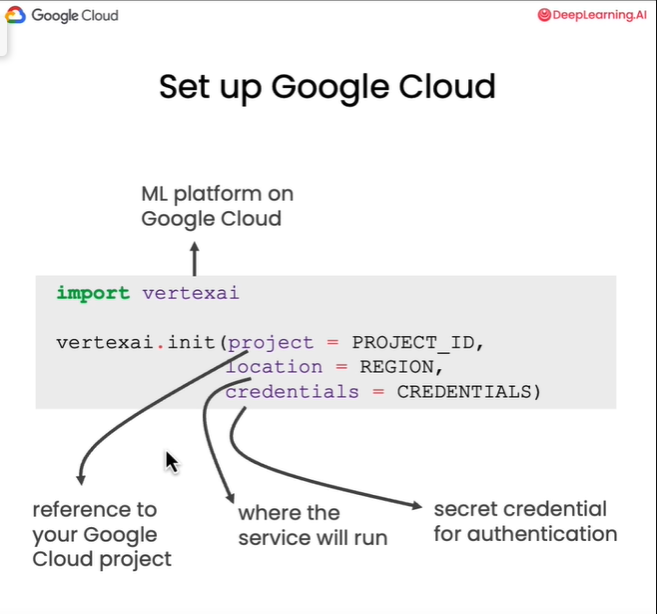

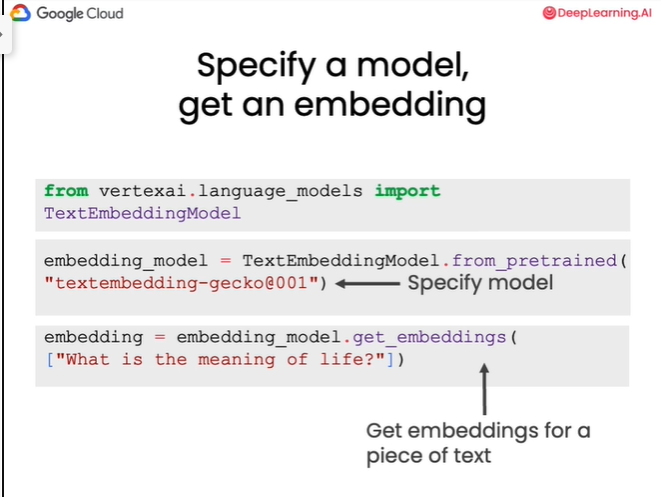

In [1]:
from utils import authenticate
credentials, PROJECT_ID = authenticate() # Get credentials and project ID

#### Enter project details

In [2]:
print(PROJECT_ID)

DLAI_PROJECT


In [3]:
REGION = 'us-central1'

In [4]:
# Import and initialize the Vertex AI Python SDK

import vertexai
vertexai.init(project = PROJECT_ID, 
              location = REGION, 
              credentials = credentials)

#### Use the embeddings model
- Import and load the model.

In [5]:
from vertexai.language_models import TextEmbeddingModel

In [6]:
embedding_model = TextEmbeddingModel.from_pretrained(
    "textembedding-gecko@001")

- Generate a word embedding

In [7]:
embedding = embedding_model.get_embeddings(
    ["life"])

- The returned object is a list with a single `TextEmbedding` object.
- The `TextEmbedding.values` field stores the embeddings in a Python list.

In [10]:
type(embedding)

list

In [11]:
len(embedding)

1

In [12]:
vector = embedding[0].values
print(f"Length = {len(vector)}")
print(vector[:10])

Length = 768
[-0.006005102302879095, 0.015532972291111946, -0.030447669327259064, 0.05322219058871269, 0.014444807544350624, -0.0542873740196228, 0.045140113681554794, 0.02127358317375183, -0.06537645310163498, 0.019103270024061203]


- Generate a sentence embedding.

In [13]:
embedding = embedding_model.get_embeddings(
    ["What is the meaning of life?"])

In [14]:
vector = embedding[0].values
print(f"Length = {len(vector)}")
print(vector[:10])

Length = 768
[0.020522113889455795, 0.02229207195341587, -0.009265718050301075, 0.005001612473279238, 0.016248879954218864, -0.018983161076903343, 0.04320966452360153, 0.02643178217113018, -0.04369377717375755, 0.023666976019740105]


#### Similarity

- Calculate the similarity between two sentences as a number between 0 and 1.
- Try out your own sentences and check if the similarity calculations match your intuition.

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
emb_1 = embedding_model.get_embeddings(
    ["What is the meaning of life?"]) # 42!

emb_2 = embedding_model.get_embeddings(
    ["How does one spend their time well on Earth?"])

emb_3 = embedding_model.get_embeddings(
    ["Would you like a salad?"])

vec_1 = [emb_1[0].values]
vec_2 = [emb_2[0].values]
vec_3 = [emb_3[0].values]

- Note: the reason we wrap the embeddings (a Python list) in another list is because the `cosine_similarity` function expects either a 2D numpy array or a list of lists.
```Python
vec_1 = [emb_1[0].values]
```

In [17]:
print(cosine_similarity(vec_1,vec_2)) 
print(cosine_similarity(vec_2,vec_3))
print(cosine_similarity(vec_1,vec_3))

[[0.65503744]]
[[0.52001556]]
[[0.54139322]]


#### From word to sentence embeddings
- One possible way to calculate sentence embeddings from word embeddings is to take the average of the word embeddings.
- This ignores word order and context, so two sentences with different meanings, but the same set of words will end up with the same sentence embedding.

In [18]:
in_1 = "The kids play in the park."
in_2 = "The play was for kids in the park."

- Remove stop words like ["the", "in", "for", "an", "is"] and punctuation.

In [19]:
in_pp_1 = ["kids", "play", "park"]
in_pp_2 = ["play", "kids", "park"]

- Generate one embedding for each word.  So this is a list of three lists.

In [20]:
embeddings_1 = [emb.values for emb in embedding_model.get_embeddings(in_pp_1)]

- Use numpy to convert this list of lists into a 2D array of 3 rows and 768 columns.

In [21]:
import numpy as np
emb_array_1 = np.stack(embeddings_1)
print(emb_array_1.shape)

(3, 768)


In [22]:
embeddings_2 = [emb.values for emb in embedding_model.get_embeddings(in_pp_2)]
emb_array_2 = np.stack(embeddings_2)
print(emb_array_2.shape)

(3, 768)


- Take the average embedding across the 3 word embeddings 
- You'll get a single embedding of length 768.

In [23]:
emb_1_mean = emb_array_1.mean(axis = 0) 
print(emb_1_mean.shape)

(768,)


In [24]:
emb_2_mean = emb_array_2.mean(axis = 0)

- Check to see that taking an average of word embeddings results in two sentence embeddings that are identical.

In [25]:
print(emb_1_mean[:4])
print(emb_2_mean[:4])

[-0.00385805 -0.00522636  0.00574341  0.03331106]
[-0.00385805 -0.00522636  0.00574341  0.03331106]


#### Get sentence embeddings from the model.
- These sentence embeddings account for word order and context.
- Verify that the sentence embeddings are not the same.

In [26]:
print(in_1)
print(in_2)

The kids play in the park.
The play was for kids in the park.


In [27]:
embedding_1 = embedding_model.get_embeddings([in_1])
embedding_2 = embedding_model.get_embeddings([in_2])

In [28]:
vector_1 = embedding_1[0].values
print(vector_1[:4])
vector_2 = embedding_2[0].values
print(vector_2[:4])

[0.0039385221898555756, -0.020830577239394188, -0.002994248876348138, -0.007580515928566456]
[-0.01565515622496605, -0.012884826399385929, 0.01229254249483347, -0.0005865463172085583]
